<a href="https://colab.research.google.com/github/BRIAN12682/Automation-Projects/blob/main/ImageClassificationVi_T.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install git+https://github.com/huggingface/transformers.git

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-ybfjerl7
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-ybfjerl7
  Resolved https://github.com/huggingface/transformers.git to commit d475f76745c0c90bb3ffc85c0ee7511705a119ba
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.42.0.dev0-py3-none-any.whl size=9139777 sha256=7814ac98160c27940cb32ed04a01442ce9da7597556ea3998cae329f67ec7783
  Stored in directory: /tmp/pip-ephem-wheel-cache-moqz5xlq/wheels/e7/9c/5b/e1a9c8007c343041e61cc484433d512ea9274272e3fcbe7c16
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.1
    Uninstalling transformers-4.41.1:
      Successfully uninstalled transformers-4.41.1


In [2]:
from transformers import ViTFeatureExtractor, ViTForImageClassification

from PIL import Image

import requests

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


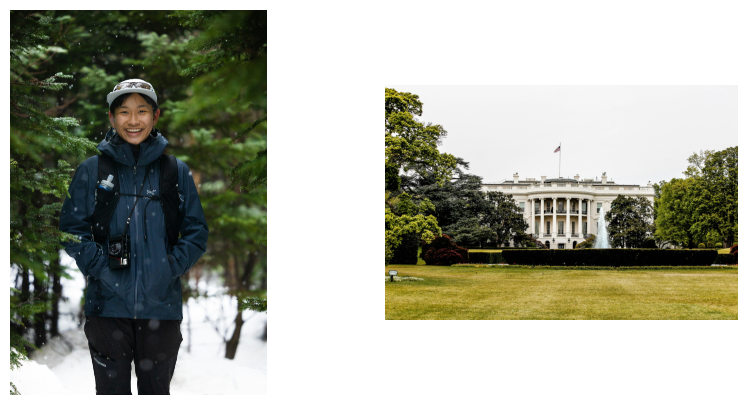

In [20]:
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Paths to the image files
img_path_1 = '/content/drive/My Drive/smileyman.jpg'
img_path_2 = '/content/drive/My Drive/whitehouse.jpg'

# Load the images
img1 = mpimg.imread(img_path_1)
img2 = mpimg.imread(img_path_2)

# Display the images side by side
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(img1)
axs[0].axis('off')  # Hide the axes for the first image

axs[1].imshow(img2)
axs[1].axis('off')  # Hide the axes for the second image

plt.show()


In [21]:
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')

model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [27]:
inputs = feature_extractor(images=img2, return_tensors="pt")

In [28]:
outputs = model(**inputs)

logits = outputs.logits

In [29]:
predicted_class_idx = logits.argmax(-1).item()

print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: palace
